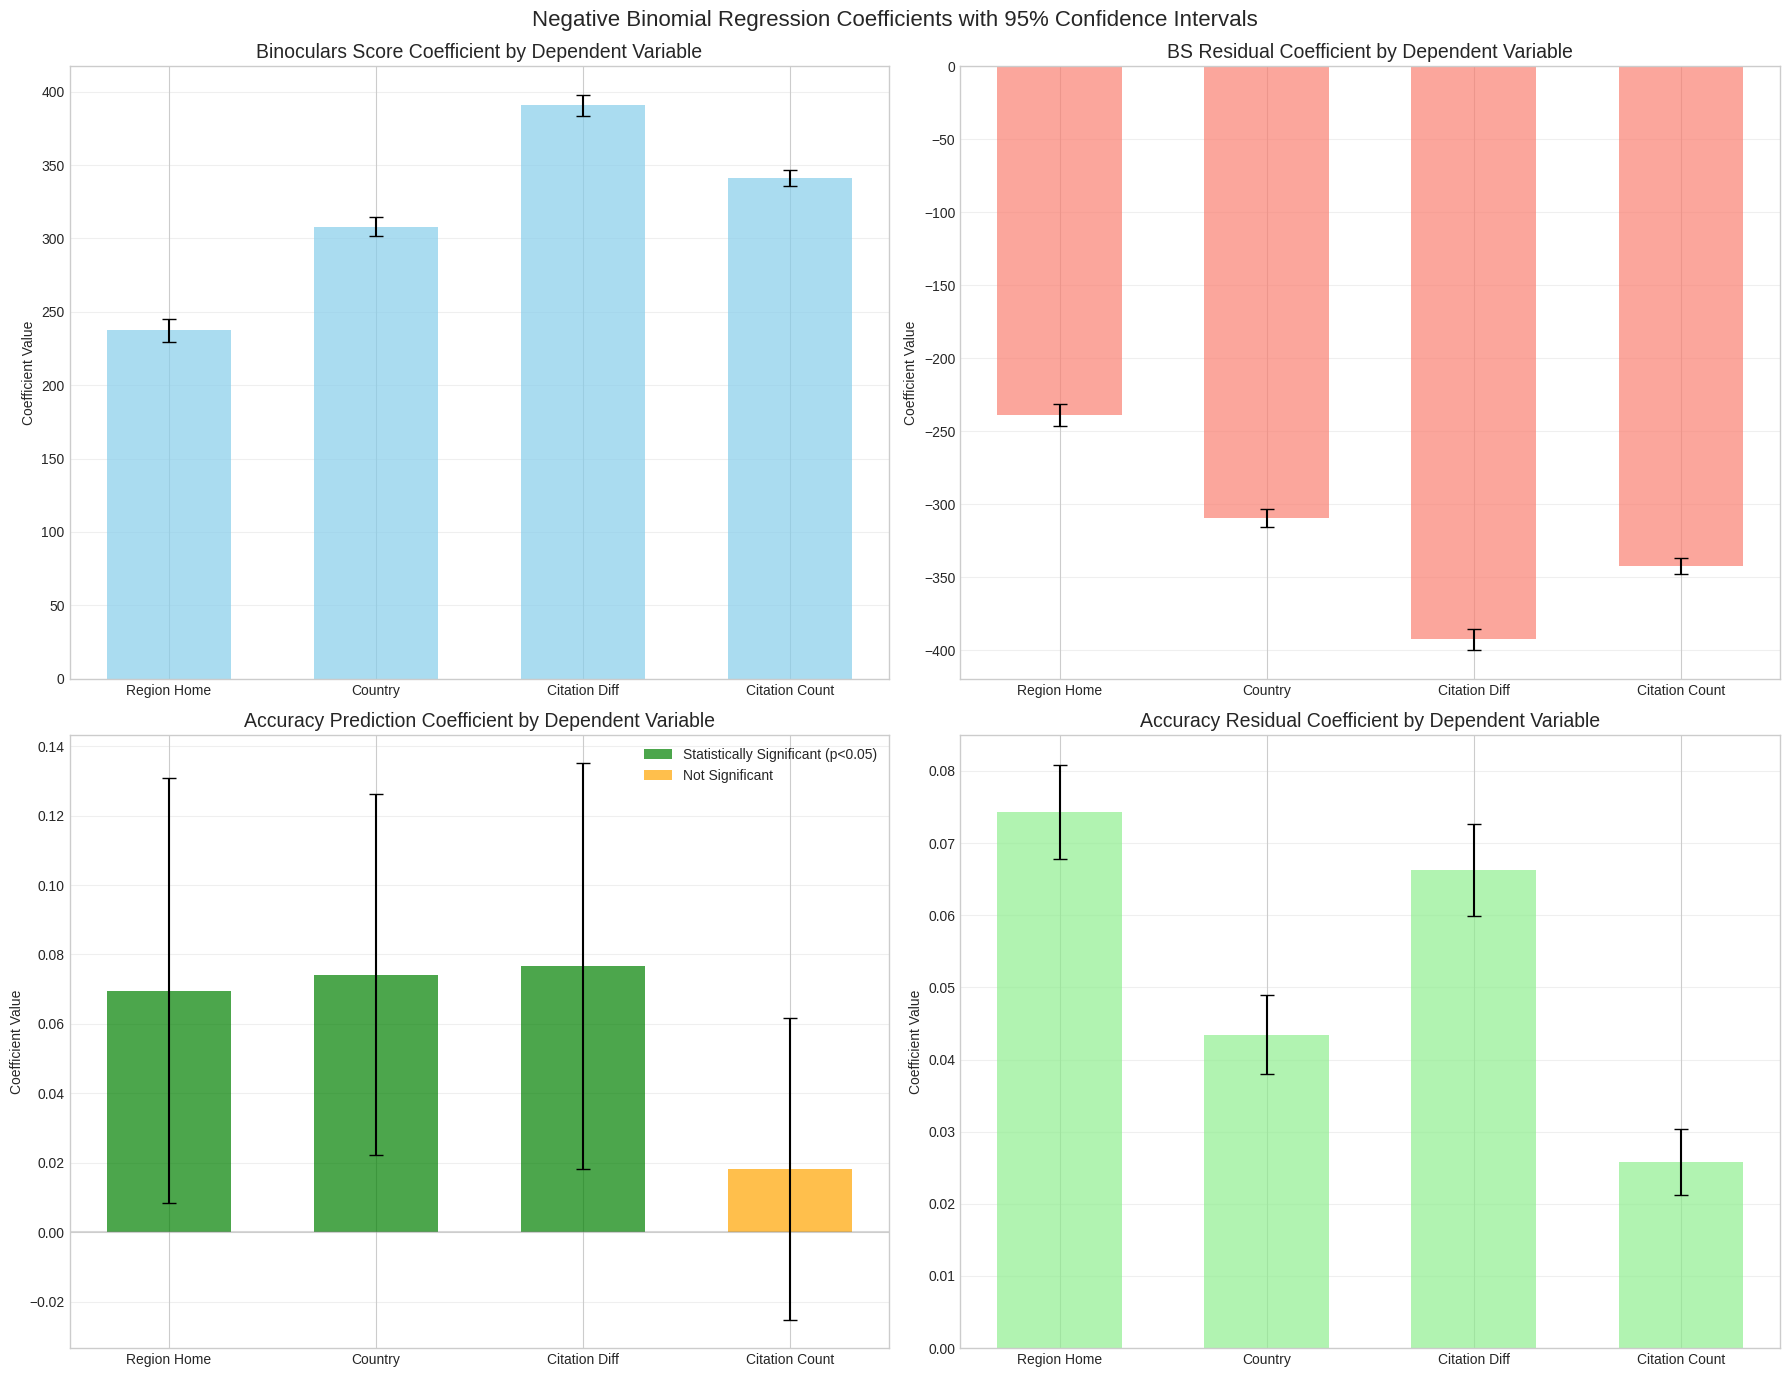

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set the plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Set up the figure with subplots - 2 rows for two model types
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Negative Binomial Regression Coefficients with 95% Confidence Intervals', fontsize=16, y=0.98)

# Define the data from your Stata outputs
# Binoculars model
binoculars_data = {
    'Dependent Variable': ['Region Home', 'Country', 'Citation Diff', 'Citation Count'],
    'Binoculars Score': [237.4542, 307.934, 390.5992, 341.1191],
    'BS Lower CI': [229.7323, 301.5917, 383.5915, 335.8732],
    'BS Upper CI': [245.1761, 314.2764, 397.6069, 346.3651],
    'BS Residual': [-239.0244, -309.315, -392.4092, -342.21],
    'BSR Lower CI': [-246.746, -315.66, -399.4235, -347.4569],
    'BSR Upper CI': [-231.3027, -302.97, -385.395, -336.9632]
}

# Accuracy model
accuracy_data = {
    'Dependent Variable': ['Region Home', 'Country', 'Citation Diff', 'Citation Count'],
    'Accuracy Prediction': [0.0695805, 0.0742223, 0.0767121, 0.0182539],
    'AP Lower CI': [0.0083796, 0.0222706, 0.0183797, -0.0253113],
    'AP Upper CI': [0.1307813, 0.126174, 0.1350445, 0.0618192],
    'Acc Residual': [0.074302, 0.0434652, 0.0663149, 0.0257938],
    'AR Lower CI': [0.0677362, 0.0380209, 0.0599262, 0.0212036],
    'AR Upper CI': [0.0808678, 0.0489095, 0.0727035, 0.0303839]
}

# Convert to DataFrames
df_binoculars = pd.DataFrame(binoculars_data)
df_accuracy = pd.DataFrame(accuracy_data)

# 1. Plot Binoculars Score coefficients (top-left)
ax = axs[0, 0]
x = np.arange(len(df_binoculars['Dependent Variable']))
y = df_binoculars['Binoculars Score']
yerr = [y - df_binoculars['BS Lower CI'], df_binoculars['BS Upper CI'] - y]

ax.bar(x, y, width=0.6, color='skyblue', alpha=0.7)
ax.errorbar(x, y, yerr=yerr, fmt='none', ecolor='black', capsize=5)
ax.set_xticks(x)
ax.set_xticklabels(df_binoculars['Dependent Variable'], rotation=0)
ax.set_title('Binoculars Score Coefficient by Dependent Variable', fontsize=14)
ax.set_ylabel('Coefficient Value')
ax.grid(True, axis='y', alpha=0.3)

# 2. Plot BS Residual coefficients (top-right)
ax = axs[0, 1]
x = np.arange(len(df_binoculars['Dependent Variable']))
y = df_binoculars['BS Residual']
yerr = [y - df_binoculars['BSR Lower CI'], df_binoculars['BSR Upper CI'] - y]
yerr = np.abs(yerr)  # Ensure positive error values

ax.bar(x, y, width=0.6, color='salmon', alpha=0.7)
ax.errorbar(x, y, yerr=yerr, fmt='none', ecolor='black', capsize=5)
ax.set_xticks(x)
ax.set_xticklabels(df_binoculars['Dependent Variable'], rotation=0)
ax.set_title('BS Residual Coefficient by Dependent Variable', fontsize=14)
ax.set_ylabel('Coefficient Value')
ax.grid(True, axis='y', alpha=0.3)

# 3. Plot Accuracy Prediction coefficients (bottom-left)
ax = axs[1, 0]
x = np.arange(len(df_accuracy['Dependent Variable']))
y = df_accuracy['Accuracy Prediction']
yerr = [y - df_accuracy['AP Lower CI'], df_accuracy['AP Upper CI'] - y]

# Add zero reference line for small coefficients
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Highlight statistical significance (CI doesn't cross zero)
colors = ['green' if low > 0 else 'orange' for low in df_accuracy['AP Lower CI']]
ax.bar(x, y, width=0.6, color=colors, alpha=0.7)
ax.errorbar(x, y, yerr=yerr, fmt='none', ecolor='black', capsize=5)
ax.set_xticks(x)
ax.set_xticklabels(df_accuracy['Dependent Variable'], rotation=0)
ax.set_title('Accuracy Prediction Coefficient by Dependent Variable', fontsize=14)
ax.set_ylabel('Coefficient Value')
ax.grid(True, axis='y', alpha=0.3)

# 4. Plot Accuracy Residual coefficients (bottom-right)
ax = axs[1, 1]
x = np.arange(len(df_accuracy['Dependent Variable']))
y = df_accuracy['Acc Residual']
yerr = [y - df_accuracy['AR Lower CI'], df_accuracy['AR Upper CI'] - y]

ax.bar(x, y, width=0.6, color='lightgreen', alpha=0.7)
ax.errorbar(x, y, yerr=yerr, fmt='none', ecolor='black', capsize=5)
ax.set_xticks(x)
ax.set_xticklabels(df_accuracy['Dependent Variable'], rotation=0)
ax.set_title('Accuracy Residual Coefficient by Dependent Variable', fontsize=14)
ax.set_ylabel('Coefficient Value')
ax.grid(True, axis='y', alpha=0.3)

# Add a legend for statistical significance in Accuracy Prediction plot
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', alpha=0.7, label='Statistically Significant (p<0.05)'),
    Patch(facecolor='orange', alpha=0.7, label='Not Significant')
]
axs[1, 0].legend(handles=legend_elements, loc='upper right')

# Adjust layout and save
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig('nbreg_results.png', dpi=300, bbox_inches='tight')
plt.show()

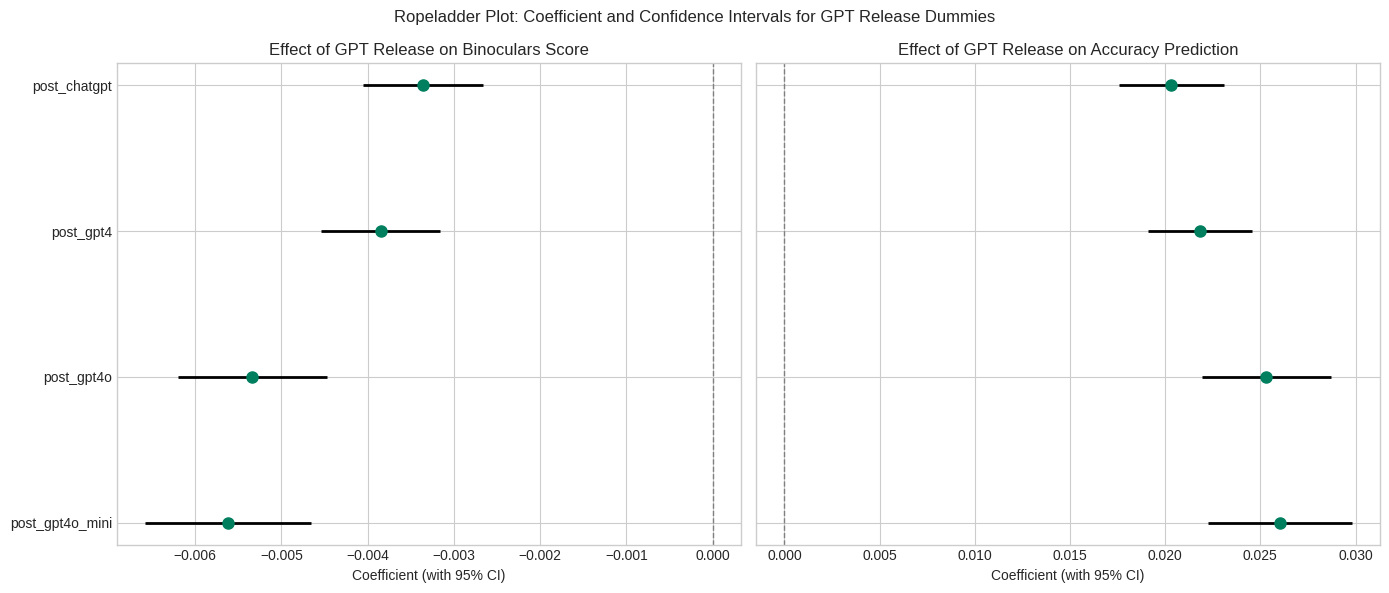

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Data for binoculars_score
# -----------------------------
df_binoculars = pd.DataFrame({
    "model": ["post_chatgpt", "post_gpt4", "post_gpt4o", "post_gpt4o_mini"],
    "coef": [-0.0033591, -0.0038506, -0.0053348, -0.0056158],
    "lower_ci": [-0.0040584, -0.0045419, -0.0061965, -0.0065752],
    "upper_ci": [-0.0026598, -0.0031592, -0.0044732, -0.0046563]
})

# -----------------------------
# Data for accuracy_prediction
# -----------------------------
df_accuracy = pd.DataFrame({
    "model": ["post_chatgpt", "post_gpt4", "post_gpt4o", "post_gpt4o_mini"],
    "coef": [0.0203234, 0.0218263, 0.0253147, 0.0260094],
    "lower_ci": [0.0175655, 0.0190996, 0.0219154, 0.0222242],
    "upper_ci": [0.0230814, 0.0245530, 0.0287140, 0.0297947]
})

# -----------------------------
# Plot
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, df, title in zip(
    axes,
    [df_binoculars, df_accuracy],
    ["Effect of GPT Release on Binoculars Score", "Effect of GPT Release on Accuracy Prediction"]
):
    ax.hlines(df['model'], df['lower_ci'], df['upper_ci'], color='black', linewidth=2)
    ax.plot(df['coef'], df['model'], 'o', color='#007F5F', markersize=8)
    ax.axvline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_title(title)
    ax.set_xlabel("Coefficient (with 95% CI)")
ax.invert_yaxis()

plt.suptitle("Ropeladder Plot: Coefficient and Confidence Intervals for GPT Release Dummies")
plt.tight_layout()
plt.show()


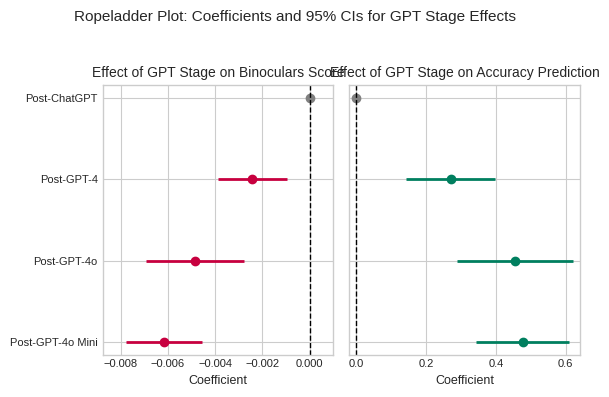

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Updated data for binoculars_score (OLS)
# -----------------------------
df_binoculars = pd.DataFrame({
    "model": ["Post-ChatGPT", "Post-GPT-4", "Post-GPT-4o", "Post-GPT-4o Mini"],
    "coef": [0, -0.0024197, -0.004855, -0.0061568],
    "lower_ci": [0, -0.0038938, -0.0069387, -0.007759],
    "upper_ci": [0, -0.0009456, -0.0027712, -0.0045547]
})

# -----------------------------
# Updated data for accuracy_prediction (Logit)
# -----------------------------
df_accuracy = pd.DataFrame({
    "model": ["Post-ChatGPT", "Post-GPT-4", "Post-GPT-4o", "Post-GPT-4o Mini"],
    "coef": [0, 0.2703038, 0.4556718, 0.4778278],
    "lower_ci": [0, 0.1428062, 0.2897459, 0.3442488],
    "upper_ci": [0, 0.3978013, 0.6215976, 0.6114068]
})

# -----------------------------
# Plot
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(6, 4), sharey=True)

for ax, df, title in zip(
    axes,
    [df_binoculars, df_accuracy],
    ["Effect of GPT Stage on Binoculars Score", "Effect of GPT Stage on Accuracy Prediction"]
):
    for i, row in df.iterrows():
        # Color code: gray for baseline, red for negative, green for positive
        if row['model'] == "Post-ChatGPT":
            color = 'gray'
        else:
            color = '#C7003F' if row['coef'] < 0 else '#007F5F'

        # Draw CI line unless it's the baseline
        if row['lower_ci'] != row['upper_ci']:
            ax.hlines(y=row['model'], xmin=row['lower_ci'], xmax=row['upper_ci'], color=color, linewidth=2)

        # Draw point estimate
        ax.plot(row['coef'], row['model'], 'o', color=color, markersize=6)

    # Vertical reference at 0
    ax.axvline(0, color='black', linestyle='--', linewidth=1)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel("Coefficient", fontsize=9)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    # X-axis margin
    margin = 0.001 if "Binoculars" in title else 0.02
    all_ci = df[['lower_ci', 'upper_ci']].values.flatten()
    ax.set_xlim(min(all_ci) - margin, max(all_ci) + margin)

axes[0].invert_yaxis()
plt.suptitle("Ropeladder Plot: Coefficients and 95% CIs for GPT Stage Effects", fontsize=11)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("gpt_ropeladder.png", dpi=600, bbox_inches='tight')
plt.show()


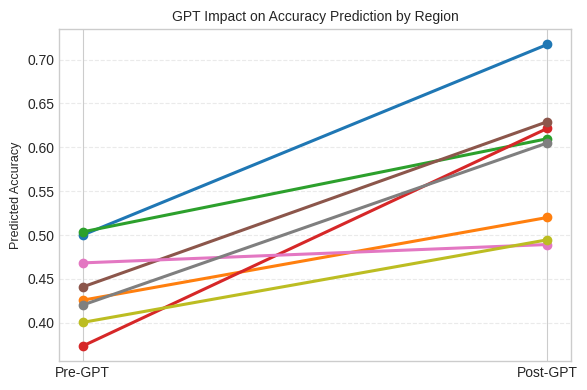

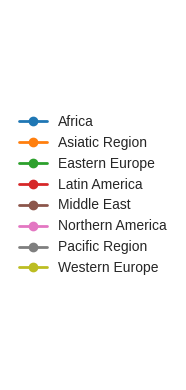

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

# Data
df = pd.DataFrame({
    "region": [
        "Africa", "Asiatic Region", "Eastern Europe", "Latin America",
        "Middle East", "Northern America", "Pacific Region", "Western Europe"
    ],
    "baseline_logit": [
        0, -0.2990101, 0.0145666, -0.5170283,
        -0.2376376, -0.1269633, -0.3216741, -0.4034078
    ],
    "interaction_logit": [
        0, -0.551562, -0.4988853, 0.0825359,
        -0.1644136, -0.8469649, -0.1827796, -0.5489806
    ],
    "post_main_logit": 0.9309161
})

# Probabilities
df["pre_logit"] = df["baseline_logit"]
df["post_logit"] = df["baseline_logit"] + df["post_main_logit"] + df["interaction_logit"]
df["pre_prob"] = 1 / (1 + np.exp(-df["pre_logit"]))
df["post_prob"] = 1 / (1 + np.exp(-df["post_logit"]))

# Updated colormap usage
cmap = colormaps['tab10']
df["color"] = [cmap(i / len(df)) for i in range(len(df))]

# Subplot: Interaction lines
fig, ax = plt.subplots(figsize=(6, 4))
for _, row in df.iterrows():
    ax.plot([2008, 2009], [row["pre_prob"], row["post_prob"]],
            marker='o', linewidth=2.2, color=row["color"])

ax.set_xticks([2008, 2009])
ax.set_xticklabels(["Pre-GPT", "Post-GPT"])
ax.set_ylabel("Predicted Accuracy", fontsize=9)
ax.set_title("GPT Impact on Accuracy Prediction by Region", fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("interaction_accuracy_subplot.png", dpi=600, bbox_inches='tight')
plt.show()

# Standalone legend
fig_legend, ax_legend = plt.subplots(figsize=(2, 4))
handles = [plt.Line2D([0], [0], color=row["color"], marker='o', linestyle='-', linewidth=2)
           for _, row in df.iterrows()]
labels = df["region"].tolist()
ax_legend.legend(handles, labels, loc='center', frameon=False)
ax_legend.axis('off')
plt.tight_layout()
plt.savefig("interaction_accuracy_legend.png", dpi=600, bbox_inches='tight')
plt.show()
plt.close("all")


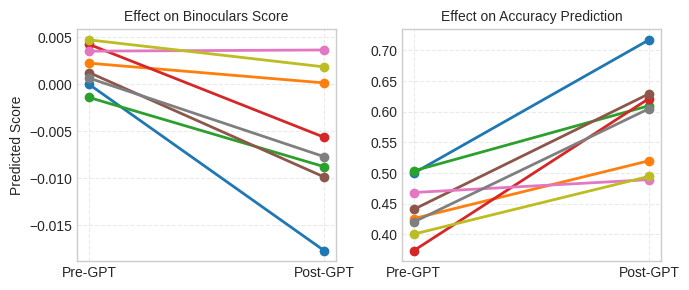

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

# Data preparation
regions = [
    "Africa", "Asiatic Region", "Eastern Europe", "Latin America",
    "Middle East", "Northern America", "Pacific Region", "Western Europe"
]

# Binoculars coefficients
df_binoculars = pd.DataFrame({
    "region": regions,
    "baseline": [0, 0.0022512, -0.0013946, 0.0042517, 0.0012585, 0.0035282, 0.0006624, 0.0047277],
    "interaction": [0, 0.015574, 0.0103144, 0.0077959, 0.0065655, 0.0177993, 0.0093212, 0.0148013],
    "post_main": -0.0176734
})
df_binoculars["pre"] = df_binoculars["baseline"]
df_binoculars["post"] = df_binoculars["baseline"] + df_binoculars["post_main"] + df_binoculars["interaction"]

# Accuracy coefficients
df_accuracy = pd.DataFrame({
    "region": regions,
    "baseline_logit": [0, -0.2990101, 0.0145666, -0.5170283, -0.2376376, -0.1269633, -0.3216741, -0.4034078],
    "interaction_logit": [0, -0.551562, -0.4988853, 0.0825359, -0.1644136, -0.8469649, -0.1827796, -0.5489806],
    "post_main_logit": 0.9309161
})
df_accuracy["pre_logit"] = df_accuracy["baseline_logit"]
df_accuracy["post_logit"] = df_accuracy["baseline_logit"] + df_accuracy["post_main_logit"] + df_accuracy["interaction_logit"]
df_accuracy["pre_prob"] = 1 / (1 + np.exp(-df_accuracy["pre_logit"]))
df_accuracy["post_prob"] = 1 / (1 + np.exp(-df_accuracy["post_logit"]))

# Colors
cmap = colormaps['tab10']
colors = [cmap(i / len(regions)) for i in range(len(regions))]

# Plot
fig, axs = plt.subplots(1, 2, figsize=(7, 3), sharex=True)

# Subplot 1: Binoculars
for i, row in df_binoculars.iterrows():
    axs[0].plot([2008, 2009], [row["pre"], row["post"]], marker='o', color=colors[i], linewidth=2)
axs[0].set_title("Effect on Binoculars Score", fontsize=10)
axs[0].set_ylabel("Predicted Score")
axs[0].set_xticks([2008, 2009])
axs[0].set_xticklabels(["Pre-GPT", "Post-GPT"])
axs[0].grid(True, linestyle='--', alpha=0.4)

# Subplot 2: Accuracy
for i, row in df_accuracy.iterrows():
    axs[1].plot([2008, 2009], [row["pre_prob"], row["post_prob"]], marker='o', color=colors[i], linewidth=2)
axs[1].set_title("Effect on Accuracy Prediction", fontsize=10)
axs[1].set_xticks([2008, 2009])
axs[1].set_xticklabels(["Pre-GPT", "Post-GPT"])
axs[1].grid(True, linestyle='--', alpha=0.4)

# Layout and save
plt.tight_layout()
plt.savefig("combined_interaction_subplot.png", dpi=600, bbox_inches='tight')
plt.show()
plt.close()


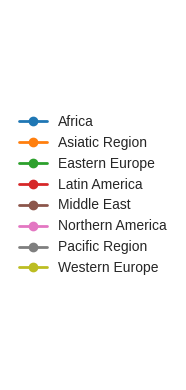

In [28]:
# Standalone legend
fig_legend, ax_legend = plt.subplots(figsize=(2, 4))
handles = [plt.Line2D([0], [0], color=row["color"], marker='o', linestyle='-', linewidth=2)
           for _, row in df.iterrows()]
labels = df["region"].tolist()
ax_legend.legend(handles, labels, loc='center', frameon=False)
ax_legend.axis('off')
plt.tight_layout()
plt.savefig("interaction_accuracy_legend.png", dpi=600, bbox_inches='tight')
plt.show()
plt.close("all")

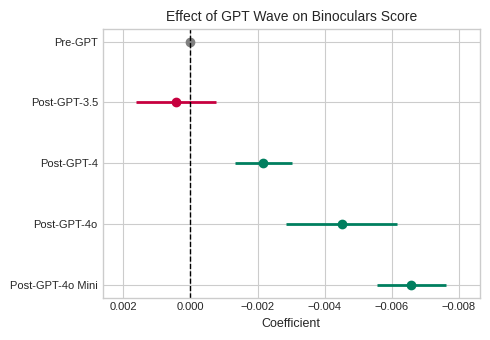

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the updated regression (binoculars_score ~ GPT wave)
df_binoculars = pd.DataFrame({
    "model": ["Pre-GPT", "Post-GPT-3.5", "Post-GPT-4", "Post-GPT-4o", "Post-GPT-4o Mini"],
    "coef": [0, 0.0004266, -0.002178, -0.0045053, -0.0065866],
    "lower_ci": [0, -0.0007613, -0.0030185, -0.006167, -0.0076277],
    "upper_ci": [0, 0.0016146, -0.0013376, -0.0028436, -0.0055455]
})

# Sort in reverse order for vertical plot
df_binoculars = df_binoculars[::-1].reset_index(drop=True)

# Plot
fig, ax = plt.subplots(figsize=(5, 3.5))

for i, row in df_binoculars.iterrows():
    if row['model'] == "Pre-GPT":
        color = 'gray'
    else:
        color = '#007F5F' if row['coef'] < 0 else '#C7003F'  # Green for neg, Red for pos

    if row['lower_ci'] != row['upper_ci']:
        ax.hlines(y=row['model'], xmin=row['lower_ci'], xmax=row['upper_ci'], color=color, linewidth=2)
    ax.plot(row['coef'], row['model'], 'o', color=color, markersize=6)

ax.axvline(0, color='black', linestyle='--', linewidth=1)
ax.set_title("Effect of GPT Wave on Binoculars Score", fontsize=10)
ax.set_xlabel("Coefficient", fontsize=9)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# Invert x-axis
all_ci = df_binoculars[['lower_ci', 'upper_ci']].values.flatten()
margin = 0.001
ax.set_xlim(max(all_ci) + margin, min(all_ci) - margin)

plt.tight_layout()
plt.savefig("binoculars_gpt_ropeladder_reversed.png", dpi=600, bbox_inches='tight')
plt.show()


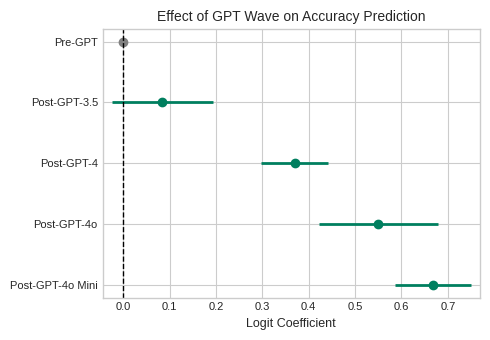

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the updated logistic regression (accuracy_prediction ~ GPT wave)
df_accuracy = pd.DataFrame({
    "model": ["Pre-GPT", "Post-GPT-3.5", "Post-GPT-4", "Post-GPT-4o", "Post-GPT-4o Mini"],
    "coef": [0, 0.0848145, 0.3697211, 0.5498899, 0.6681092],
    "lower_ci": [0, -0.0242015, 0.2971795, 0.4220167, 0.5869894],
    "upper_ci": [0, 0.1938306, 0.4422628, 0.6777631, 0.7492291]
})

# Sort in reverse order for vertical plot
df_accuracy = df_accuracy[::-1].reset_index(drop=True)

# Plot
fig, ax = plt.subplots(figsize=(5, 3.5))

for i, row in df_accuracy.iterrows():
    if row['model'] == "Pre-GPT":
        color = 'gray'
    else:
        color = '#C7003F' if row['coef'] < 0 else '#007F5F'  # Green for pos, Red for neg

    if row['lower_ci'] != row['upper_ci']:
        ax.hlines(y=row['model'], xmin=row['lower_ci'], xmax=row['upper_ci'], color=color, linewidth=2)
    ax.plot(row['coef'], row['model'], 'o', color=color, markersize=6)

ax.axvline(0, color='black', linestyle='--', linewidth=1)
ax.set_title("Effect of GPT Wave on Accuracy Prediction", fontsize=10)
ax.set_xlabel("Logit Coefficient", fontsize=9)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# Set axis limits with margin
all_ci = df_accuracy[['lower_ci', 'upper_ci']].values.flatten()
margin = 0.02
ax.set_xlim(min(all_ci) - margin, max(all_ci) + margin)

plt.tight_layout()
plt.savefig("accuracy_gpt_ropeladder.png", dpi=600, bbox_inches='tight')
plt.show()


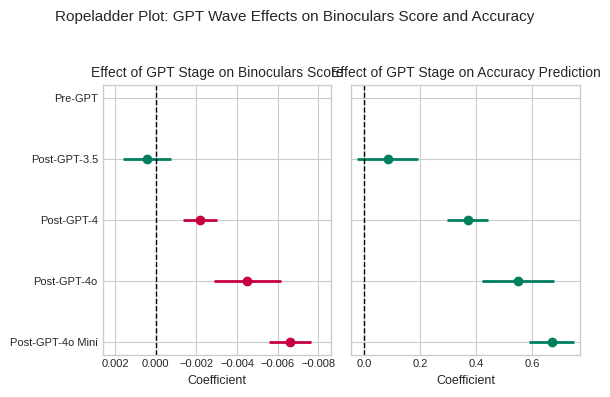

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Binoculars Score Data (OLS) ---
df_binoculars = pd.DataFrame({
    "model": ["Pre-GPT", "Post-GPT-3.5", "Post-GPT-4", "Post-GPT-4o", "Post-GPT-4o Mini"],
    "coef": [0, 0.0004266, -0.002178, -0.0045053, -0.0065866],
    "lower_ci": [0, -0.0007613, -0.0030185, -0.006167, -0.0076277],
    "upper_ci": [0, 0.0016146, -0.0013376, -0.0028436, -0.0055455]
})

# --- Accuracy Prediction Data (Logit) ---
df_accuracy = pd.DataFrame({
    "model": ["Pre-GPT", "Post-GPT-3.5", "Post-GPT-4", "Post-GPT-4o", "Post-GPT-4o Mini"],
    "coef": [0, 0.0848145, 0.3697211, 0.5498899, 0.6681092],
    "lower_ci": [0, -0.0242015, 0.2971795, 0.4220167, 0.5869894],
    "upper_ci": [0, 0.1938306, 0.4422628, 0.6777631, 0.7492291]
})

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(6, 4), sharey=True)

for ax, df, title, invert_x in zip(
    axes,
    [df_binoculars[::-1], df_accuracy[::-1]],  # Reverse for vertical ordering
    ["Effect of GPT Stage on Binoculars Score", "Effect of GPT Stage on Accuracy Prediction"],
    [True, False]
):
    for i, row in df.iterrows():
        color = 'gray' if row['model'] == "Pre-GPT" else ('#C7003F' if row['coef'] < 0 else '#007F5F')
        # Draw confidence interval line
        ax.hlines(y=row['model'], xmin=row['lower_ci'], xmax=row['upper_ci'], color=color, linewidth=2)
        # Draw point marker (except baseline)
        if row['model'] != "Pre-GPT":
            ax.plot(row['coef'], row['model'], 'o', color=color, markersize=6)

    ax.axvline(0, color='black', linestyle='--', linewidth=1)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel("Coefficient", fontsize=9)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    # X-axis limits with margin
    all_ci = df[['lower_ci', 'upper_ci']].values.flatten()
    margin = 0.001 if "Binoculars" in title else 0.02
    ax.set_xlim(min(all_ci) - margin, max(all_ci) + margin)

    if invert_x:
        ax.invert_xaxis()

plt.suptitle("Ropeladder Plot: GPT Wave Effects on Binoculars Score and Accuracy", fontsize=11)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("combined_ropeladder_gpt.png", dpi=600, bbox_inches='tight')
plt.show()


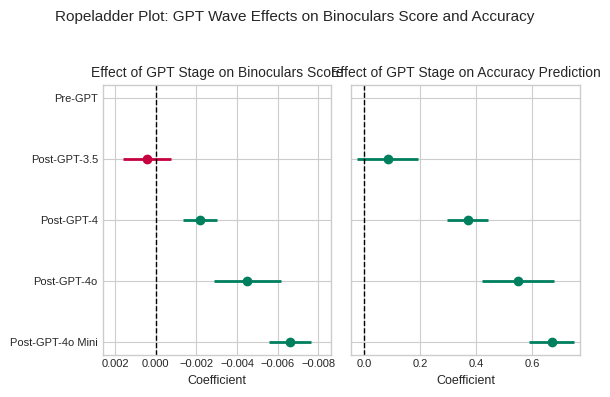

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Binoculars Score Data (OLS) ---
df_binoculars = pd.DataFrame({
    "model": ["Pre-GPT", "Post-GPT-3.5", "Post-GPT-4", "Post-GPT-4o", "Post-GPT-4o Mini"],
    "coef": [0, 0.0004266, -0.002178, -0.0045053, -0.0065866],
    "lower_ci": [0, -0.0007613, -0.0030185, -0.006167, -0.0076277],
    "upper_ci": [0, 0.0016146, -0.0013376, -0.0028436, -0.0055455]
})

# --- Accuracy Prediction Data (Logit) ---
df_accuracy = pd.DataFrame({
    "model": ["Pre-GPT", "Post-GPT-3.5", "Post-GPT-4", "Post-GPT-4o", "Post-GPT-4o Mini"],
    "coef": [0, 0.0848145, 0.3697211, 0.5498899, 0.6681092],
    "lower_ci": [0, -0.0242015, 0.2971795, 0.4220167, 0.5869894],
    "upper_ci": [0, 0.1938306, 0.4422628, 0.6777631, 0.7492291]
})

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(6, 4), sharey=True)

for ax_idx, (ax, df, title, invert_x) in enumerate(zip(
    axes,
    [df_binoculars[::-1], df_accuracy[::-1]],
    ["Effect of GPT Stage on Binoculars Score", "Effect of GPT Stage on Accuracy Prediction"],
    [True, False]
)):
    for i, row in df.iterrows():
        if row['model'] == "Pre-GPT":
            color = 'gray'
        else:
            if ax_idx == 0:  # Invert color scheme for binoculars subplot
                color = '#007F5F' if row['coef'] < 0 else '#C7003F'
            else:
                color = '#C7003F' if row['coef'] < 0 else '#007F5F'

        # Draw confidence interval line
        ax.hlines(y=row['model'], xmin=row['lower_ci'], xmax=row['upper_ci'], color=color, linewidth=2)
        if row['model'] != "Pre-GPT":
            ax.plot(row['coef'], row['model'], 'o', color=color, markersize=6)

    ax.axvline(0, color='black', linestyle='--', linewidth=1)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel("Coefficient", fontsize=9)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    all_ci = df[['lower_ci', 'upper_ci']].values.flatten()
    margin = 0.001 if "Binoculars" in title else 0.02
    ax.set_xlim(min(all_ci) - margin, max(all_ci) + margin)

    if invert_x:
        ax.invert_xaxis()


plt.suptitle("Ropeladder Plot: GPT Wave Effects on Binoculars Score and Accuracy", fontsize=11)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("combined_ropeladder_gpt_invertedcolor.png", dpi=600, bbox_inches='tight')
plt.show()


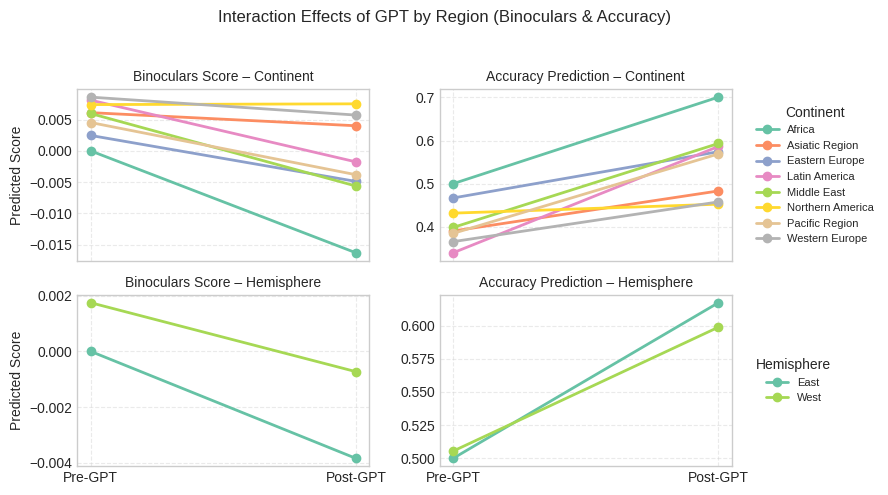

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

# Hemisphere Regions
hemisphere = ["East", "West"]

# --- Binoculars Score (OLS) Hemisphere-level ---
df_binoculars_hem = pd.DataFrame({
    "region": hemisphere,
    "baseline": [0, 0.001743],
    "interaction": [0, 0.0013646],
    "post_main": -0.0038364
})
df_binoculars_hem["pre"] = df_binoculars_hem["baseline"]
df_binoculars_hem["post"] = df_binoculars_hem["baseline"] + df_binoculars_hem["post_main"] + df_binoculars_hem["interaction"]

# --- Accuracy (Logit) Hemisphere-level ---
df_accuracy_hem = pd.DataFrame({
    "region": hemisphere,
    "baseline_logit": [0, 0.0218237],
    "interaction_logit": [0, -0.0991909],
    "post_main_logit": 0.4779136
})
df_accuracy_hem["pre_logit"] = df_accuracy_hem["baseline_logit"]
df_accuracy_hem["post_logit"] = df_accuracy_hem["baseline_logit"] + df_accuracy_hem["post_main_logit"] + df_accuracy_hem["interaction_logit"]
df_accuracy_hem["pre_prob"] = 1 / (1 + np.exp(-df_accuracy_hem["pre_logit"]))
df_accuracy_hem["post_prob"] = 1 / (1 + np.exp(-df_accuracy_hem["post_logit"]))

# Continent Regions
continents = [
    "Africa", "Asiatic Region", "Eastern Europe", "Latin America",
    "Middle East", "Northern America", "Pacific Region", "Western Europe"
]

# --- Binoculars Score (OLS) Continent-level ---
df_binoculars_cont = pd.DataFrame({
    "region": continents,
    "baseline": [0, 0.0061124, 0.0024653, 0.0081149, 0.0059784, 0.0073992, 0.0045343, 0.0085969],
    "interaction": [0, 0.0142184, 0.0089581, 0.0064362, 0.0047079, 0.0164404, 0.0079624, 0.0134442],
    "post_main": -0.0163178
})
df_binoculars_cont["pre"] = df_binoculars_cont["baseline"]
df_binoculars_cont["post"] = df_binoculars_cont["baseline"] + df_binoculars_cont["post_main"] + df_binoculars_cont["interaction"]

# --- Accuracy (Logit) Continent-level ---
df_accuracy_cont = pd.DataFrame({
    "region": continents,
    "baseline_logit": [0, -0.4467221, -0.1329015, -0.6648126, -0.4120267, -0.275153, -0.4699033, -0.5514886],
    "interaction_logit": [0, -0.4718774, -0.4192402, 0.1624713, -0.0617111, -0.767088, -0.1029685, -0.4692823],
    "post_main_logit": 0.8512353
})
df_accuracy_cont["pre_logit"] = df_accuracy_cont["baseline_logit"]
df_accuracy_cont["post_logit"] = df_accuracy_cont["baseline_logit"] + df_accuracy_cont["post_main_logit"] + df_accuracy_cont["interaction_logit"]
df_accuracy_cont["pre_prob"] = 1 / (1 + np.exp(-df_accuracy_cont["pre_logit"]))
df_accuracy_cont["post_prob"] = 1 / (1 + np.exp(-df_accuracy_cont["post_logit"]))

# === Color scheme ===
cmap = colormaps["Set2"]
colors_hem = [cmap(i/2) for i in range(2)]
colors_cont = [cmap(i/len(continents)) for i in range(len(continents))]

# === Plot ===
fig, axs = plt.subplots(2, 2, figsize=(9, 5), sharex=True)

# 1. Binoculars by Continent
for i, row in df_binoculars_cont.iterrows():
    axs[0, 0].plot([2008, 2009], [row["pre"], row["post"]], marker='o', color=colors_cont[i], linewidth=2, label=row["region"])
axs[0, 0].set_title("Binoculars Score – Continent", fontsize=10)
axs[0, 0].set_ylabel("Predicted Score")
axs[0, 0].set_xticks([2008, 2009])
axs[0, 0].set_xticklabels(["Pre-GPT", "Post-GPT"])
axs[0, 0].grid(True, linestyle='--', alpha=0.4)

# 2. Accuracy by Continent
for i, row in df_accuracy_cont.iterrows():
    axs[0, 1].plot([2008, 2009], [row["pre_prob"], row["post_prob"]], marker='o', color=colors_cont[i], linewidth=2, label=row["region"])
axs[0, 1].set_title("Accuracy Prediction – Continent", fontsize=10)
axs[0, 1].set_xticks([2008, 2009])
axs[0, 1].set_xticklabels(["Pre-GPT", "Post-GPT"])
axs[0, 1].grid(True, linestyle='--', alpha=0.4)

# 3. Binoculars by Hemisphere
for i, row in df_binoculars_hem.iterrows():
    axs[1, 0].plot([2008, 2009], [row["pre"], row["post"]], marker='o', color=colors_hem[i], linewidth=2, label=row["region"])
axs[1, 0].set_title("Binoculars Score – Hemisphere", fontsize=10)
axs[1, 0].set_ylabel("Predicted Score")
axs[1, 0].set_xticks([2008, 2009])
axs[1, 0].set_xticklabels(["Pre-GPT", "Post-GPT"])
axs[1, 0].grid(True, linestyle='--', alpha=0.4)

# 4. Accuracy by Hemisphere
for i, row in df_accuracy_hem.iterrows():
    axs[1, 1].plot([2008, 2009], [row["pre_prob"], row["post_prob"]], marker='o', color=colors_hem[i], linewidth=2, label=row["region"])
axs[1, 1].set_title("Accuracy Prediction – Hemisphere", fontsize=10)
axs[1, 1].set_xticks([2008, 2009])
axs[1, 1].set_xticklabels(["Pre-GPT", "Post-GPT"])
axs[1, 1].grid(True, linestyle='--', alpha=0.4)

# Layout
axs[0, 1].legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=8, title="Continent")
axs[1, 1].legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=8, title="Hemisphere")
plt.suptitle("Interaction Effects of GPT by Region (Binoculars & Accuracy)", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("interaction_by_continent_and_hemisphere.png", dpi=600, bbox_inches='tight')
plt.show()
